In [198]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns

In [199]:
npi_infoclean=pd.read_pickle('data/npi_infoclean.pkl')

In [200]:
hop_teaming_filterd=pd.read_pickle('data/hop_teaming_filterd.pkl')

In [201]:
taxo_df=pd.read_csv('data/nucc_taxonomy_200.csv')

In [202]:
taxo_clean=taxo_df[['Code', 'Grouping', 'Classification', 'Specialization']]

In [203]:
npi_infoclean.head()

,NPI,Entity_Type_Code,p_org_name,p_last_name,p_first_name,p_other_org_name,p_other_org_name_typecode,p_business_add1,p_businss_add2,p_city,p_state,p_zipcode,p_country,p_phone,taxonomy,ziplength
0,1679576722,1,None,WIEBE,DAVID,None,None,3500 CENTRAL AVE,None,KEARNEY,NE,688472944,US,3088652512,207X00000X,68847
1,1588667638,1,None,PILCHER,WILLIAM,None,None,1824 KING STREET,SUITE 300,JACKSONVILLE,FL,322044736,US,9043881820,207RC0000X,32204
2,1497758544,2,"CUMBERLAND COUNTY HOSPITAL SYSTEM, INC",None,None,CAPE FEAR VALLEY HOME HEALTH AND HOSPICE,3,3418 VILLAGE DR,None,FAYETTEVILLE,NC,283044552,US,9106096740,251G00000X,28304
3,1306849450,1,None,SMITSON,HAROLD,None,None,810 LUCAS DR,None,ATHENS,TX,757513446,US,9036756778,2085R0202X,75751
4,1215930367,1,None,GRESSOT,LAURENT,None,None,17323 RED OAK DR,None,HOUSTON,TX,770901243,US,2814405006,207RH0003X,77090


In [204]:
npi_infoclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6111510 entries, 0 to 6277895
Data columns (total 16 columns):
NPI                          object
Entity_Type_Code             object
p_org_name                   object
p_last_name                  object
p_first_name                 object
p_other_org_name             object
p_other_org_name_typecode    object
p_business_add1              object
p_businss_add2               object
p_city                       object
p_state                      object
p_zipcode                    object
p_country                    object
p_phone                      object
taxonomy                     object
ziplength                    object
dtypes: object(16)
memory usage: 792.7+ MB


In [205]:
npi_infoclean[['NPI', 'Entity_Type_Code']]=npi_infoclean[['NPI', 'Entity_Type_Code']].apply(pd.to_numeric)

In [206]:
npi_infoclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6111510 entries, 0 to 6277895
Data columns (total 16 columns):
NPI                          int64
Entity_Type_Code             int64
p_org_name                   object
p_last_name                  object
p_first_name                 object
p_other_org_name             object
p_other_org_name_typecode    object
p_business_add1              object
p_businss_add2               object
p_city                       object
p_state                      object
p_zipcode                    object
p_country                    object
p_phone                      object
taxonomy                     object
ziplength                    object
dtypes: int64(2), object(14)
memory usage: 792.7+ MB


In [207]:
hop_teaming_filterd.head()

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
3,1033142146,1000000004,491,535,10.232,36.558
6,1013977990,1003000126,134,145,27.352,51.137
8,1013996669,1003000126,91,92,35.152,68.009
10,1033102504,1003000126,52,64,15.328,38.300
15,1003029620,1003000126,111,121,33.058,58.981


In [208]:
hop_teaming_filterd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31127390 entries, 3 to 741287
Data columns (total 6 columns):
from_npi             int64
to_npi               int64
patient_count        int64
transaction_count    int64
average_day_wait     float64
std_day_wait         float64
dtypes: float64(2), int64(4)
memory usage: 1.6 GB


#Merge npi and hop_teaming but only to filter entity_type_code to 1 or 2

In [209]:
#Left Merge NPI and hop_teaming-Include only NPI, entity_type_code and taxonomy from NPI file
nh_merge=pd.merge(hop_teaming_filterd, npi_infoclean[['NPI', 'Entity_Type_Code']], \
                  how = 'left', left_on='from_npi', right_on='NPI')

In [210]:
#select entity type code that is 1.0- Only from_npi with code = 1 is selected
nh_merge=nh_merge.query('Entity_Type_Code=="1.0"')

In [211]:
nh_merge=nh_merge[['from_npi', 'to_npi', 'patient_count', 'average_day_wait']]

In [212]:
nh_merge.shape

(16062886, 4)

In [213]:
nh_merge=pd.merge(nh_merge, \
    npi_infoclean[['NPI', 'Entity_Type_Code']],\
                  how='left', left_on='to_npi', right_on='NPI')

In [214]:
nh_merge=nh_merge.query('Entity_Type_Code==2.0')

In [215]:
nh_merge=nh_merge[['from_npi', 'to_npi', 'patient_count', 'average_day_wait']]

In [216]:
nh_merge.head()

,from_npi,to_npi,patient_count,average_day_wait
4,1033194220,1003000308,62,26.175
5,1003818055,1003000563,101,0.000
13,1013967371,1003001538,46,21.033
14,1023073459,1003001553,25,34.314
15,1023003142,1003001553,164,33.923


In [217]:
nh_merge.shape

#nh_merge.to_csv('data/example_df.csv', index = False)

(8731252, 4)

Top patient_count- Providers with maximum referrals to hospitals
Which are the hospitals in US?

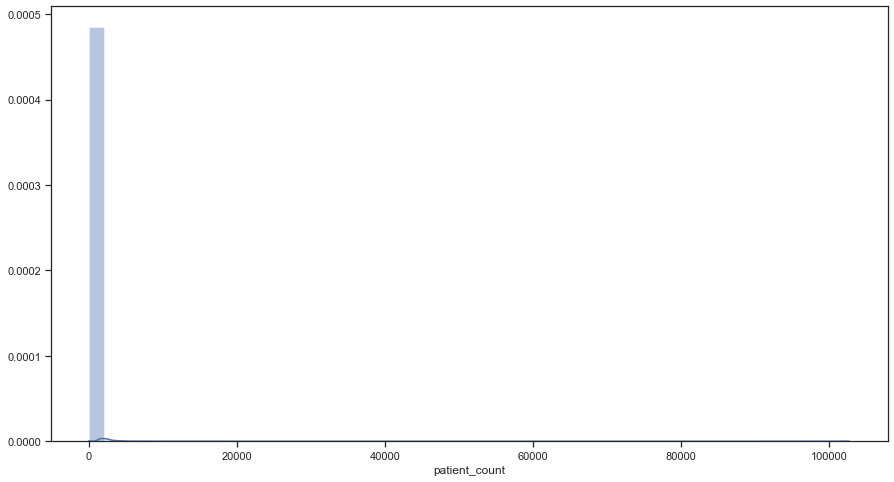

In [218]:
#sns.distplot(nh_merge['patient_count'])

# Analyze how facility type referrals differ by specialty
Do orthopedists refer to different types of facilities than cardiologists?

specialty of drs.

# TN data

In [219]:
# Add taxonomy code and state by merging with NPI_infoclean dataframe (df)
nh_merge_state=pd.merge(hop_teaming_filterd, npi_infoclean[['NPI', 'Entity_Type_Code', 'p_city', 'p_state', 'taxonomy']], \
                  how = 'left', left_on='from_npi', right_on='NPI')

In [220]:
# filter for entity_type_code 1 and 2 for from_npi and to_npi respectively
nh_merge_state=nh_merge_state.query('Entity_Type_Code==1.0')

In [221]:
#rename and remove NPI
nh_merge_state=nh_merge_state.rename(columns={"p_city": 'from_city', "p_state": 'from_state', 'taxonomy': 'from_taxo_code'})


In [222]:
nh_merge_state=nh_merge_state[['from_npi', 'to_npi', 'patient_count', 'average_day_wait', 'from_city', 'from_state', 'from_taxo_code']]

In [223]:
nh_merge_state.head()

,from_npi,to_npi,patient_count,average_day_wait,from_city,from_state,from_taxo_code
1,1013977990,1003000126,134,27.352,PORTSMOUTH,VA,207P00000X
2,1013996669,1003000126,91,35.152,SALEM,VA,207RC0000X
4,1003029620,1003000126,111,33.058,CHARLOTTESVILLE,VA,2085R0202X
6,1023122595,1003000134,61,37.567,EVANSTON,IL,208600000X
8,1033194220,1003000308,62,26.175,ATLANTA,GA,2085R0202X


In [224]:
#merge2: merge to_npi to NPI and include the taxonomy and state from NPI file
nh_merge_state=pd.merge(nh_merge_state, npi_infoclean[['NPI', 'Entity_Type_Code', 'p_city', 'p_state', 'taxonomy', 'p_org_name']], \
                  how = 'left', left_on='to_npi', right_on='NPI')

In [225]:
# query for entity type code to 2
nh_merge_state=nh_merge_state.query('Entity_Type_Code==2.0')

In [226]:
#rename and remove NPI-2nd time
nh_merge_state=nh_merge_state.rename(columns={"p_city": 'to_city', "p_state": 'to_state', 'taxonomy': 'to_taxo_code'})
nh_merge_state=nh_merge_state[['from_npi', 'to_npi', 'patient_count', 'average_day_wait', 'from_city', 'from_state', 'from_taxo_code', \
                         'to_city', 'to_state', 'to_taxo_code', 'p_org_name']]

In [227]:
#select from_state and to_state for TN
#nh_merge_tn=nh_merge_tn.query('from_state=="TN"')

In [228]:
nh_merge_state.head()

,from_npi,to_npi,patient_count,average_day_wait,from_city,from_state,from_taxo_code,to_city,to_state,to_taxo_code,p_org_name
4,1033194220,1003000308,62,26.175,ATLANTA,GA,2085R0202X,ATLANTA,GA,231H00000X,"KEITH M DOCKERY, MD PC"
5,1003818055,1003000563,101,0.000,ROSEVILLE,CA,207RG0100X,ROSEVILLE,CA,261QP2300X,"RICHARD B. D. CHUN, M.D. PROFESSIONAL CORPORATION"
13,1013967371,1003001538,46,21.033,MARION,OH,207Y00000X,MARION,OH,207R00000X,MIDWEST INTERNAL MEDICINE ASSOC.
14,1023073459,1003001553,25,34.314,PROVO,UT,207WX0107X,OGDEN,UT,207R00000X,OGDEN INTERNAL MEDICINE & UROLOGY LLC
15,1023003142,1003001553,164,33.923,OGDEN,UT,207RC0000X,OGDEN,UT,207R00000X,OGDEN INTERNAL MEDICINE & UROLOGY LLC


In [229]:
#merge with taxonomy dataset
nh_merge_state=pd.merge(nh_merge_state, taxo_clean, how='left', left_on='from_taxo_code', right_on='Code')

In [230]:
nh_merge_state.head(2)

,from_npi,to_npi,patient_count,average_day_wait,from_city,from_state,from_taxo_code,to_city,to_state,to_taxo_code,p_org_name,Code,Grouping,Classification,Specialization
0,1033194220,1003000308,62,26.175,ATLANTA,GA,2085R0202X,ATLANTA,GA,231H00000X,"KEITH M DOCKERY, MD PC",2085R0202X,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology
1,1003818055,1003000563,101,0.000,ROSEVILLE,CA,207RG0100X,ROSEVILLE,CA,261QP2300X,"RICHARD B. D. CHUN, M.D. PROFESSIONAL CORPORATION",207RG0100X,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology


In [231]:
nh_merge_taxo_state=nh_merge_state.query('Grouping=="Allopathic & Osteopathic Physicians"')
nh_merge_taxo_state.Grouping.value_counts()

Allopathic & Osteopathic Physicians    6839697
Name: Grouping, dtype: int64

In [232]:
nh_merge_taxo_state.to_pickle('data/nh_merge_taxo_state.pkl')

nh_merge_tn_otherstate=nh_merge_tn.query('from_state=="TN" and to_state!="TN"')
nh_merge_tn_otherstate.query('to_state=="AK"')

# facility type referrals differ by speciality in TN

In [233]:
nh_merge_tn=nh_merge_state.query('from_state=="TN"')

In [234]:
# Sort by patient_counts in TN
nh_merge_spez=nh_merge_tn.sort_values(by="patient_count", ascending=False)
nh_merge_spez.head(2)

,from_npi,to_npi,patient_count,average_day_wait,from_city,from_state,from_taxo_code,to_city,to_state,to_taxo_code,p_org_name,Code,Grouping,Classification,Specialization
2310173,1093753303,1003863580,102736,0.000,BRENTWOOD,TN,207ZP0102X,BRENTWOOD,TN,207ZP0102X,"ASSOCIATED PATHOLOGISTS, LLC",207ZP0102X,Allopathic & Osteopathic Physicians,Pathology,Anatomic Pathology & Clinical Pathology
2402695,1093753303,1235186800,87351,0.455,BRENTWOOD,TN,207ZP0102X,NASHVILLE,TN,291U00000X,"PATHGROUP LABS, LLC",207ZP0102X,Allopathic & Osteopathic Physicians,Pathology,Anatomic Pathology & Clinical Pathology


In [235]:
#nh_merge_tn.Grouping.value_counts()

In [236]:
#number of times a specific specialization referred the patients to the facility
grouping=nh_merge_tn.query('Grouping=="Allopathic & Osteopathic Physicians"')
c=grouping.groupby(['Classification'])['patient_count'].count().reset_index()
c.sort_values(by="patient_count", ascending=False)

,Classification,patient_count
10,Internal Medicine,59808
29,Radiology,28418
6,Family Medicine,19401
5,Emergency Medicine,9589
22,Pathology,6402
30,Surgery,4835
1,Anesthesiology,4760
19,Orthopaedic Surgery,4730
28,Psychiatry & Neurology,4488
8,Hospitalist,3084


In [237]:
c.head(10)

,Classification,patient_count
0,Allergy & Immunology,720
1,Anesthesiology,4760
2,Clinical Pharmacology,4
3,Colon & Rectal Surgery,142
4,Dermatology,956
5,Emergency Medicine,9589
6,Family Medicine,19401
7,General Practice,664
8,Hospitalist,3084
9,Independent Medical Examiner,2


In [238]:
#grouping.groupby(['Classification', 'from_npi'])['patient_count'].sum()

In [239]:
#grouping.groupby(['Classification', 'from_npi'])['Classification'].count()

In [240]:
grouping.query('Classification=="Independent Medical Examiner"')

,from_npi,to_npi,patient_count,average_day_wait,from_city,from_state,from_taxo_code,to_city,to_state,to_taxo_code,p_org_name,Code,Grouping,Classification,Specialization
3079007,1447268024,1295780476,38,17.983,NASHVILLE,TN,202C00000X,NASHVILLE,TN,282N00000X,HTI MEMORIAL HOSPITAL CORPORATION,202C00000X,Allopathic & Osteopathic Physicians,Independent Medical Examiner,NaN
3312556,1447268024,1871779124,48,0.000,NASHVILLE,TN,202C00000X,NASHVILLE,TN,208600000X,"PRAMOD B. WASUDEV, M.D., PLLC",202C00000X,Allopathic & Osteopathic Physicians,Independent Medical Examiner,NaN


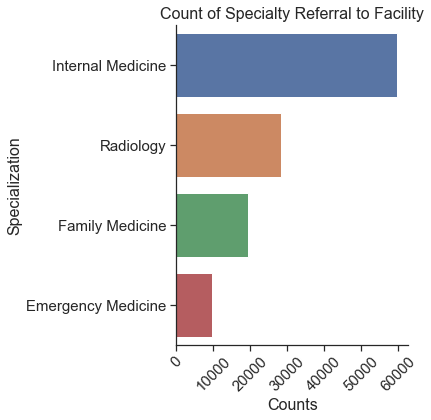

In [241]:
c1=c.query("patient_count >= 9000")
c1=c1.sort_values(by='patient_count', ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes("pastel")
sns.barplot(x="patient_count", y="Classification", data=c1,
            label="Specialty", color="navy", palette="deep")
sns.despine()
plt.title('Count of Specialty Referral to Facility', fontsize=16)
plt.xlabel('Counts', fontsize=16)
plt.ylabel('Specialization', fontsize=16)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("specialty.png", dpi=300);

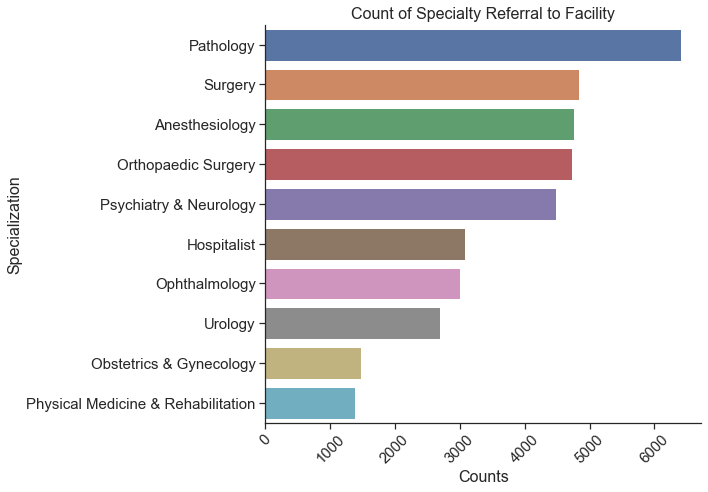

In [242]:
#c2=c.query("patient_count <= 9000 or patient_count >1000")
c2=c[(c['patient_count'] > 1000) & (c['patient_count'] < 9000)]
c2=c2.sort_values(by='patient_count', ascending=False)
f, ax = plt.subplots(figsize=(10, 7))
sns.set_color_codes("pastel")
sns.barplot(x="patient_count", y="Classification", data=c2, label="Specialty", color="navy", palette="deep")
sns.despine()
plt.title('Count of Specialty Referral to Facility', fontsize=16)
plt.xlabel('Counts', fontsize=16)
plt.ylabel('Specialization', fontsize=16)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("specialty1.png", dpi=300);

In [243]:
c2.head()

,Classification,patient_count
22,Pathology,6402
30,Surgery,4835
1,Anesthesiology,4760
19,Orthopaedic Surgery,4730
28,Psychiatry & Neurology,4488


nh_tn_count=nh_merge_tn.groupby(['p_org_name'])['Classification'].count().reset_index()
nh_tn_count_sort=nh_tn_count.sort_values(by="Classification", ascending=False)

In [244]:
nh_tn_count1=nh_merge_tn.groupby(['p_org_name', 'Classification']).count().reset_index()
#nh_tn_count1.head()

int_path=

e = e[(e.country == 'Indonesia')|(e.country == 'Japan')|(e.country == 'China')|(e.country == 'Pakistan')|(e.country == 'Italy')|(e.country == 'Iran')|(e.country == 'Peru')| (e.country == 'Chile') | (e.country == 'Guatemala') | (e.country == 'Mexico')]
f, ax = plt.subplots(figsize=(15, 5))
pal = sns.color_palette("Set3", 13)
j = e.groupby(['country', 'secondary_effects'])['death'].sum().unstack()
j.nlargest(10,[
'T,L',
'T,F',
'L',
'F',
'L,F',
'L,F,Lq',
'L,Lq',
'T',
'T,L,Lq',
'T,LF',
'T,Lq']).plot(kind='barh', color=pal, stacked=True, ax=ax);

In [ ]:
#specialities in TN: select specific dataset

In [ ]:
#Groupby provider name?

In [ ]:
#ipwidget for speciality
from ipywidgets import interact
from ipywidgets import Dropdown
import matplotlib.pyplot as plt

In [ ]:
x_widget = Dropdown(options= nh_merge_taxo_state['from_state'].unique())
#y_widget = Dropdown(options= nh_merge_tn['to_city'].unique())
y_widget=Dropdown()
#Define a function that updates the content of y based on what we select for x
def update(*args):
    y_widget.options = nh_merge_taxo_state[nh_merge_taxo_state['from_state'] == x_widget.value]['to_city'].unique()
x_widget.observe(update)

def special_selector(State, city):
    
    city_fav=nh_merge_taxo_state[nh_merge_taxo_state['to_city']== city]
    sns.set(rc={'figure.figsize': (15,8)}, style='white')
    sns.set_style("ticks")
    specialization=city_fav['Classification'].value_counts().head(10)
    sns.barplot(specialization.index, specialization.values, palette="cubehelix")
    sns.despine()
    plt.xlabel('', fontsize=16)
    plt.ylabel('Counts', fontsize=16)
    plt.xticks(fontsize=15, rotation=90)
    plt.yticks(fontsize=15);

In [ ]:
def special_selector(State, city):
    
    city_fav=nh_merge_taxo_state[nh_merge_taxo_state['to_city']== city]
    sns.set(rc={'figure.figsize': (15,8)}, style='white')
    sns.set_style("ticks")
    specialization=city_fav['Classification'].value_counts().head(10)
    sns.barplot(specialization.index, specialization.values, palette="cubehelix")

In [ ]:
i=nh_merge_taxo_state.iloc[0:100]

In [ ]:
nh

In [ ]:
interact(special_selector,
        State=x_widget,
        city= y_widget);

In [ ]:
x_widget = Dropdown(options= nh_merge_taxo_state['from_state'].unique())
#y_widget = Dropdown(options= nh_merge_taxo_state['from_state'].unique())
y_widget=Dropdown()
#Define a function that updates the content of y based on what we select for x
def update(*args):
    y_widget.options = nh_merge_taxo_state[nh_merge_taxo_state['from_state'] == x_widget.value]['Classification'].unique()
x_widget.observe(update)

def special_selector(State, Specialty):
    
    city_fav=nh_merge_taxo_state[nh_merge_taxo_state['Classification']== Specialty]
    sns.set(rc={'figure.figsize': (15,8)}, style='white')
    sns.set_style("ticks")
    specialization=city_fav['from_npi'].value_counts().head()
    sns.barplot(specialization.index, specialization.values, palette="cubehelix")
    sns.despine()
    plt.xlabel('', fontsize=16)
    plt.ylabel('Counts', fontsize=16)
    plt.xticks(fontsize=15, rotation=90)
    plt.yticks(fontsize=15);

In [162]:
interact(special_selector,
        State=x_widget,
        Specialty= y_widget);

interactive(children=(Dropdown(description='State', options=('GA', 'CA', 'OH', 'UT', 'KY', 'IL', 'MI', 'FL', '…

In [166]:
nh_merge_taxo_state.query('from_npi==1487859294')

,from_npi,to_npi,patient_count,average_day_wait,from_city,from_state,from_taxo_code,to_city,to_state,to_taxo_code,p_org_name,Code,Grouping,Classification,Specialization
1054952,1487859294,1659352276,36,41.370,MECCA,CA,202C00000X,SAN DIEGO,CA,291U00000X,LABORATORY CORPORATION OF AMERICA,202C00000X,Allopathic & Osteopathic Physicians,Independent Medical Examiner,NaN
1164118,1487859294,1932381605,142,0.000,MECCA,CA,202C00000X,COACHELLA,CA,261QF0400X,"CLINICAS DE SALUD DEL PUEBLO, INC",202C00000X,Allopathic & Osteopathic Physicians,Independent Medical Examiner,NaN
3369534,1487859294,1013981554,40,25.695,MECCA,CA,202C00000X,RANCHO MIRAGE,CA,282N00000X,EISENHOWER MEDICAL CENTER,202C00000X,Allopathic & Osteopathic Physicians,Independent Medical Examiner,NaN
3499261,1487859294,1366479099,111,13.232,MECCA,CA,202C00000X,WEST HILLS,CA,291U00000X,UNILAB CORPORATION,202C00000X,Allopathic & Osteopathic Physicians,Independent Medical Examiner,NaN
3573535,1487859294,1568416147,51,26.500,MECCA,CA,202C00000X,PALM DESERT,CA,2085R0202X,DESERT ADVANCED IMAGING MEDICAL CENTER,202C00000X,Allopathic & Osteopathic Physicians,Independent Medical Examiner,NaN


In [ ]:
taxo_df.head()

In [ ]:
## 

# Number of patients seen by specialists in TN vs NY or nashville vs NY city or Boston

# Find mean

# Merging NPI and taxonomy on the taxonomy code

In [ ]:
npi_taxo=pd.merge(npi_infoclean, taxo_df, how='left', left_on='taxonomy', right_on='Code')

In [ ]:
npi_taxo.info()

In [ ]:
npi_taxo=npi_taxo[['NPI', 'Entity_Type_Code', 'p_org_name', 'p_last_name', 'p_first_name', 'p_other_org_name',\
                  'p_other_org_name_typecode', 'p_business_add1', 'p_businss_add2', 'p_city', 'p_state', \
                  'taxonomy', 'ziplength', 'Grouping', 'Classification', 'Specialization']]

In [ ]:
npi_taxo.head()

In [ ]:
npi_taxo_nash=npi_taxo.query('p_city=="NASHVILLE"')